Given a electric dipole with charge $q$ and distance $d$, the electric potential ($V$) is given by:

$$ V(r) = k_e q \left( \frac{1}{r_2} - \frac{1}{r_1} \right) $$

and the electric field ($\vec{E}$) is given in its components by:


$$ E_x = k_eq \left( \frac{x-\frac{d}{2}}{r_2^2} - \frac{x+\frac{d}{2}}{r_1^2} \right)$$

$$ E_y = k_eq \thinspace y \left( \frac{1}{r_2^2} - \frac{1}{r_1^2} \right) $$

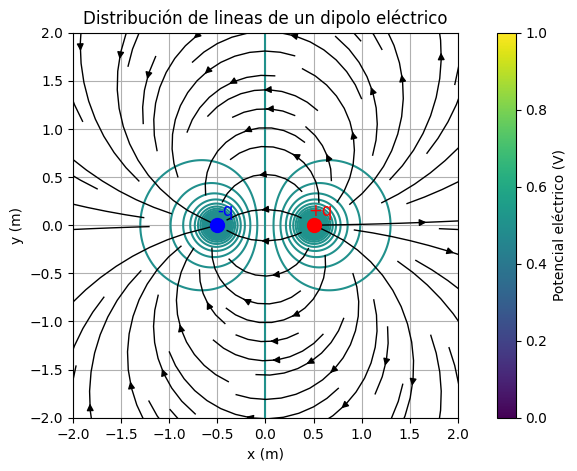

In [1]:
import numpy as np
import matplotlib.pyplot as plt

k = 8.9875e9
q = 1.602e-19
d = 1.0

# Definir el tamaño y el rango del espacio de graficación
rango = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(rango, rango)

r1 = np.sqrt((X + d/2)**2 + Y**2)
r2 = np.sqrt((X - d/2)**2 + Y**2)

Ex = k*q*((X - d/2)/(r2*r2) - (X + d/2)/(r1*r1))
Ey = k*q*Y*(1/(r2*r2) - 1/(r1*r1))
V = k*q*(1/r2 - 1/r1)


plt.figure(figsize=(10, 5))
plt.contour(X, Y, V, levels = 1000)
plt.streamplot(X, Y, Ex, Ey, color = 'black', linewidth=1, arrowsize=1)
plt.plot(-d/2, 0, 'bo', markersize=10)
plt.plot(d/2, 0, 'ro', markersize=10)
plt.text(-d/2, 0.1, '-q', color='blue', fontsize=12, ha='left')
plt.text(d/2 - 0.05, 0.1, '+q', color='red', fontsize=12, ha='left')
plt.title('Distribución de lineas de un dipolo eléctrico')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(label='Potencial eléctrico (V)')
plt.show()

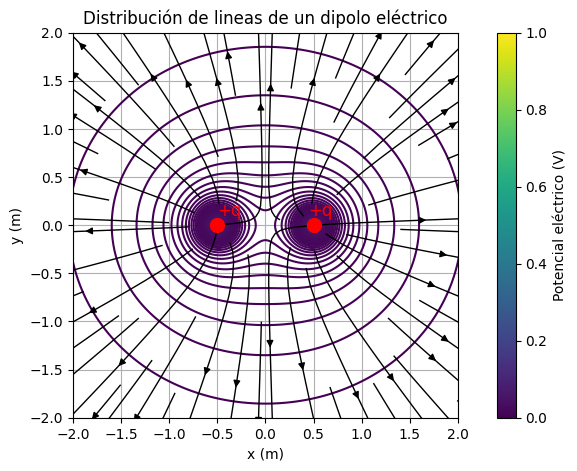

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k = 8.9875e9
q = 1.602e-19
d = 1.0

# Definir el tamaño y el rango del espacio de graficación
rango = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(rango, rango)

r1 = np.sqrt((X + d/2)**2 + Y**2)
r2 = np.sqrt((X - d/2)**2 + Y**2)

Ex = k*q*((X - d/2)/(r2*r2) + (X + d/2)/(r1*r1))
Ey = k*q*Y*(1/(r2*r2) + 1/(r1*r1))
V = k*q*(1/r2 + 1/r1)


plt.figure(figsize=(10, 5))
plt.contour(X, Y, V, levels = 1000)
plt.streamplot(X, Y, Ex, Ey, color = 'black', linewidth=1, arrowsize=1)
plt.plot(-d/2, 0, 'ro', markersize=10)
plt.plot(d/2, 0, 'ro', markersize=10)
plt.text(-d/2, 0.1, '+q', color='red', fontsize=12, ha='left')
plt.text(d/2 - 0.05, 0.1, '+q', color='red', fontsize=12, ha='left')
plt.title('Distribución de lineas de un dipolo eléctrico')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(label='Potencial eléctrico (V)')
plt.show()

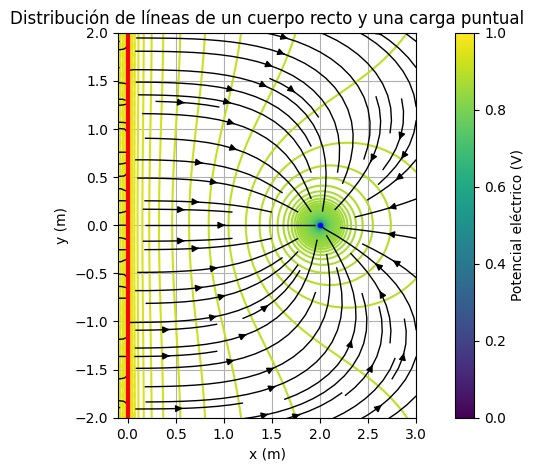

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the grid
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)

# Parameters
L = 10.0  # Length of the charged rod (vertical)
lambda_q = 1.0  # Linear charge density (C/m)
Q = 2.0  # Point charge magnitude
a = 2  # Position of point charge (Q) at (a, 0)
k = 1.0  # Coulomb constant (simplified)

# Electric potential due to the vertical charged rod (along y-axis from -L/2 to L/2)
def potential_rod(x, y):
    # Integration over the rod (approximated numerically)
    rod_positions = np.linspace(-L/2, L/2, 100)
    dV = 0
    for y_rod in rod_positions:
        r = np.sqrt((x)**2 + (y-y_rod)**2)
        dV += k * lambda_q * (L / len(rod_positions)) / r
    return dV

# Potential due to the point charge (Q)
def potential_point(x, y):
    r = np.sqrt((x - a)**2 + y**2)
    return -k * Q / r

# Total potential (rod + point charge)
V_rod = potential_rod(X, Y)
V_point = potential_point(X, Y)
V_total = V_rod + V_point

# Numerical gradient for electric field (Ex, Ey)
dx = x[1] - x[0]
dy = y[1] - y[0]
Ey, Ex = np.gradient(-V_total, dy, dx)  # E = -∇V



plt.figure(figsize=(10, 5))
plt.contour(X, Y, V_total, levels = 200)
plt.streamplot(X, Y, Ex, Ey, color = 'black',density = 1.5, linewidth=1, arrowsize=1)
plt.plot([a],[0], 'b.', label=f'Point Charge (Q={Q})')
plt.plot([0,0],[-L/2, L/2],'r', linewidth=3, label='Charged Rod (Vertical)')
plt.title('Distribución de líneas de un cuerpo recto y una carga puntual')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)
plt.xlim(-0.1, 3)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(label='Potencial eléctrico (V)')
plt.show()

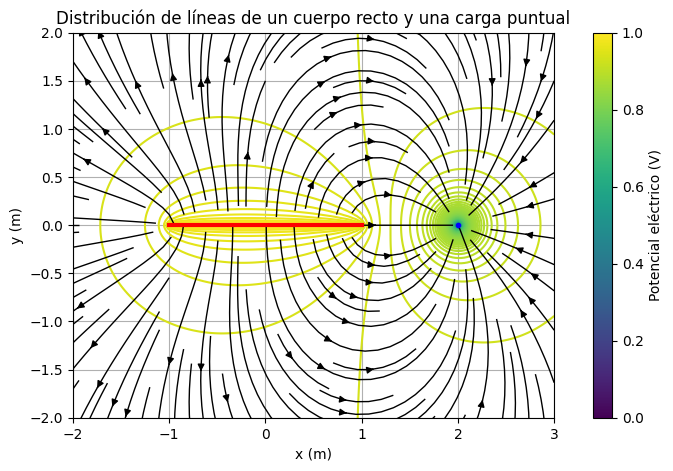

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the grid
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)

# Parameters
L = 2.0  # Length of the charged rod (vertical)
lambda_q = 1.0  # Linear charge density (C/m)
Q = 2.0  # Point charge magnitude
a = 2  # Position of point charge (Q) at (a, 0)
k = 1.0  # Coulomb constant (simplified)

# Electric potential due to the vertical charged rod (along y-axis from -L/2 to L/2)
def potential_rod(x, y):
    # Integration over the rod (approximated numerically)
    rod_positions = np.linspace(-L/2, L/2, 100)
    dV = 0
    for x_rod in rod_positions:
        r = np.sqrt((x - x_rod)**2 + (y)**2)
        dV += k * lambda_q * (L / len(rod_positions)) / r
    return dV

# Potential due to the point charge (Q)
def potential_point(x, y):
    r = np.sqrt((x - a)**2 + y**2)
    return -k * Q / r

# Total potential (rod + point charge)
V_rod = potential_rod(X, Y)
V_point = potential_point(X, Y)
V_total = V_rod + V_point

# Numerical gradient for electric field (Ex, Ey)
dx = x[1] - x[0]
dy = y[1] - y[0]
Ey, Ex = np.gradient(-V_total, dy, dx)  # E = -∇V



plt.figure(figsize=(10, 5))
plt.contour(X, Y, V_total, levels = 200)
plt.streamplot(X, Y, Ex, Ey, color = 'black',density = 1.5, linewidth=1, arrowsize=1)
plt.plot([a],[0], 'b.', label=f'Point Charge (Q={Q})')
plt.plot([-L/2,L/2],[0, 0],'r', linewidth=3, label='Charged Rod (Vertical)')
plt.title('Distribución de líneas de un cuerpo recto y una carga puntual')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)
plt.xlim(-2, 3)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(label='Potencial eléctrico (V)')
plt.show()